<a href="https://colab.research.google.com/github/345bc/TriTueNhanTao/blob/main/BaiTapTuan4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chuẩn bị file dữ liệu (graph.txt)

In [56]:
content = """5
0 1 1 1 0
1 0 1 0 1
1 1 0 1 1
1 0 1 0 1
0 1 1 1 0"""
with open("graph.txt", "w") as f:
    f.write(content)
print("Đã tạo file graph.txt")

Đã tạo file graph.txt


In [57]:
import networkx as nx
import matplotlib.pyplot as plt
import sys

In [58]:
def doc_ma_tran(filename):
    try:
        with open(filename, 'r') as f:
            data = f.read().split()

        iterator = iter(data)
        n = int(next(iterator))

        graph_matrix = []
        for _ in range(n):
            row = []
            for _ in range(n):
                row.append(int(next(iterator)))
            graph_matrix.append(row)

        print(f"-> Đã đọc file '{filename}' thành công ({n} đỉnh).")
        return n, graph_matrix
    except FileNotFoundError:
        print("Lỗi: Không tìm thấy file!")
        sys.exit()

-> Đã đọc file 'graph.txt' thành công (5 đỉnh).


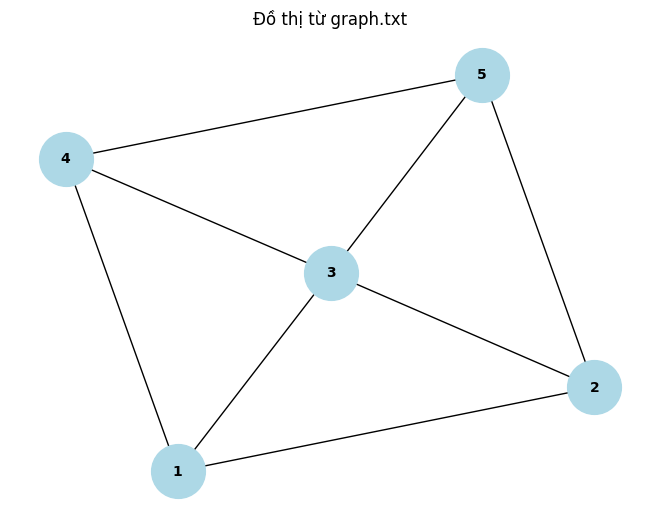

In [59]:
if __name__ == "__main__":
    ten_file = "graph.txt"
    n, graph_matrix = doc_ma_tran(ten_file)

    # Create a graph from the adjacency matrix
    G = nx.Graph()
    for i in range(n):
        G.add_node(i + 1) # Node labels are 1-based

    for i in range(n):
        for j in range(i + 1, n):
            if graph_matrix[i][j] == 1:
                G.add_edge(i + 1, j + 1)

    # Draw the graph
    pos = nx.spring_layout(G) # Layout algorithm for positioning nodes
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=10, font_weight='bold')
    plt.title("Đồ thị từ graph.txt")
    plt.show()

In [60]:
content = """5
0 1 1 1 0
1 0 1 0 1
1 1 0 1 1
1 0 1 0 1
0 1 1 1 0"""
with open("graph.txt", "w") as f:
    f.write(content)
print("Đã tạo file graph.txt")

Đã tạo file graph.txt


Code Python (Modular)

In [61]:
import sys

def doc_ma_tran(filename):
    try:
        with open(filename, 'r') as f:
            data = f.read().split()

        iterator = iter(data)
        n = int(next(iterator))

        graph = []
        for _ in range(n):
            row = []
            for _ in range(n):
                row.append(int(next(iterator)))
            graph.append(row)

        print(f"-> Đã đọc file '{filename}' thành công ({n} đỉnh).")
        return n, graph
    except FileNotFoundError:
        print("Lỗi: Không tìm thấy file!")
        sys.exit()

def to_mau_do_thi(n, graph):
    colors = [-1] * n

    colors[0] = 0

    for u in range(1, n):
        available = [True] * n

        for i in range(n):
            if graph[u][i] == 1 and colors[i] != -1:
                color_of_neighbor = colors[i]
                available[color_of_neighbor] = False

        cr = 0
        while cr < n:
            if available[cr]:
                break
            cr += 1

        colors[u] = cr

    return colors

def in_ket_qua(colors):
    print("\n--- KẾT QUẢ TÔ MÀU ---")
    print(f"{'Đỉnh':<10} {'Màu':<10}")
    print("-" * 20)
    for i, color in enumerate(colors):
        print(f"{i + 1:<10} Màu {color}")

if __name__ == "__main__":
    ten_file = "graph.txt"
    n, graph = doc_ma_tran(ten_file)
    ket_qua_mau = to_mau_do_thi(n, graph)
    in_ket_qua(ket_qua_mau)

-> Đã đọc file 'graph.txt' thành công (5 đỉnh).

--- KẾT QUẢ TÔ MÀU ---
Đỉnh       Màu       
--------------------
1          Màu 0
2          Màu 1
3          Màu 2
4          Màu 1
5          Màu 0


Kết quả chạy file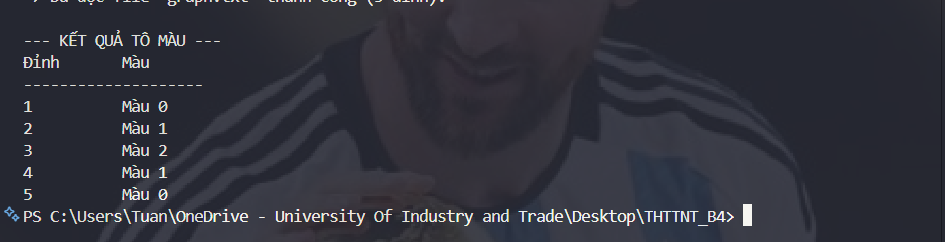

Tạo file dữ liệu tsp.txt

In [62]:
content = """4
0 10 15 20
10 0 35 25
15 35 0 30
20 25 30 0"""
with open("tsp.txt", "w") as f:
    f.write(content)
print("Đã tạo file tsp.txt")

Đã tạo file tsp.txt


Code Python (Backtracking)

In [63]:
import sys

min_cost = float('inf')
best_path = []

def doc_file_tsp(filename):
    try:
        with open(filename, 'r') as f:
            data = f.read().split()

        iterator = iter(data)
        n = int(next(iterator))

        cost_matrix = []
        for _ in range(n):
            row = []
            for _ in range(n):
                row.append(int(next(iterator)))
            cost_matrix.append(row)

        return n, cost_matrix
    except FileNotFoundError:
        print("Lỗi: Không tìm thấy file!")
        sys.exit()

def tsp_backtracking(current_city, count, current_cost, path, visited, n, cost_matrix):
    global min_cost, best_path

    if current_cost >= min_cost:
        return

    if count == n:
        start_node = path[0]
        cost_back = cost_matrix[current_city][start_node]

        if cost_back > 0:
            total_cost = current_cost + cost_back
            if total_cost < min_cost:
                min_cost = total_cost
                best_path = path[:] + [start_node]
        return

    for next_city in range(n):
        if not visited[next_city] and cost_matrix[current_city][next_city] > 0:

            visited[next_city] = True
            path.append(next_city)

            tsp_backtracking(next_city, count + 1, current_cost + cost_matrix[current_city][next_city], path, visited, n, cost_matrix)

            visited[next_city] = False
            path.pop()

if __name__ == "__main__":
    ten_file = "tsp.txt"
    n, cost_matrix = doc_file_tsp(ten_file)

    visited = [False] * n

    start_node = 0
    visited[start_node] = True
    path = [start_node]

    tsp_backtracking(start_node, 1, 0, path, visited, n, cost_matrix)

    if min_cost == float('inf'):
        print("Không tìm thấy chu trình Hamilton.")
    else:
        print("\n--- KẾT QUẢ TSP ---")
        print(f"Chi phí tối thiểu: {min_cost}")
        path_display = [str(p + 1) for p in best_path]
        print(f"Lộ trình: {' -> '.join(path_display)}")


--- KẾT QUẢ TSP ---
Chi phí tối thiểu: 80
Lộ trình: 1 -> 2 -> 4 -> 3 -> 1


In [64]:
content = """5
0 1 1 1 0
1 0 1 0 1
1 1 0 1 1
1 0 1 0 1
0 1 1 1 0"""
with open("graph.txt", "w") as f:
    f.write(content)
print("Đã tạo file graph.txt")

Đã tạo file graph.txt


In [65]:
import sys

def doc_ma_tran(filename):
    try:
        with open(filename, 'r') as f:
            data = f.read().split()

        iterator = iter(data)
        n = int(next(iterator))

        graph = []
        for _ in range(n):
            row = []
            for _ in range(n):
                row.append(int(next(iterator)))
            graph.append(row)

        print(f"-> Đã đọc file '{filename}' thành công ({n} đỉnh).")
        return n, graph
    except FileNotFoundError:
        print("Lỗi: Không tìm thấy file!")
        sys.exit()

def to_mau_do_thi(n, graph):
    colors = [-1] * n

    colors[0] = 0

    for u in range(1, n):
        available = [True] * n

        for i in range(n):
            if graph[u][i] == 1 and colors[i] != -1:
                color_of_neighbor = colors[i]
                available[color_of_neighbor] = False

        cr = 0
        while cr < n:
            if available[cr]:
                break
            cr += 1

        colors[u] = cr

    return colors

def in_ket_qua(colors):
    print("\n--- KẾT QUẢ TÔ MÀU ---")
    print(f"{'Đỉnh':<10} {'Màu':<10}")
    print("-" * 20)
    for i, color in enumerate(colors):
        print(f"{i + 1:<10} Màu {color}")

if __name__ == "__main__":
    ten_file = "graph.txt"
    n, graph = doc_ma_tran(ten_file)
    ket_qua_mau = to_mau_do_thi(n, graph)
    in_ket_qua(ket_qua_mau)

-> Đã đọc file 'graph.txt' thành công (5 đỉnh).

--- KẾT QUẢ TÔ MÀU ---
Đỉnh       Màu       
--------------------
1          Màu 0
2          Màu 1
3          Màu 2
4          Màu 1
5          Màu 0


In [66]:
content = """4
0 10 15 20
10 0 35 25
15 35 0 30
20 25 30 0"""
with open("tsp.txt", "w") as f:
    f.write(content)
print("Đã tạo file tsp.txt")

Đã tạo file tsp.txt


In [67]:
import sys

min_cost = float('inf')
best_path = []

def doc_file_tsp(filename):
    try:
        with open(filename, 'r') as f:
            data = f.read().split()

        iterator = iter(data)
        n = int(next(iterator))

        cost_matrix = []
        for _ in range(n):
            row = []
            for _ in range(n):
                row.append(int(next(iterator)))
            cost_matrix.append(row)

        return n, cost_matrix
    except FileNotFoundError:
        print("Lỗi: Không tìm thấy file!")
        sys.exit()

def tsp_backtracking(current_city, count, current_cost, path, visited, n, cost_matrix):
    global min_cost, best_path

    if current_cost >= min_cost:
        return

    if count == n:
        start_node = path[0]
        cost_back = cost_matrix[current_city][start_node]

        if cost_back > 0:
            total_cost = current_cost + cost_back
            if total_cost < min_cost:
                min_cost = total_cost
                best_path = path[:] + [start_node]
        return

    for next_city in range(n):
        if not visited[next_city] and cost_matrix[current_city][next_city] > 0:

            visited[next_city] = True
            path.append(next_city)

            tsp_backtracking(next_city, count + 1, current_cost + cost_matrix[current_city][next_city], path, visited, n, cost_matrix)

            visited[next_city] = False
            path.pop()

if __name__ == "__main__":
    ten_file = "tsp.txt"
    n, cost_matrix = doc_file_tsp(ten_file)

    visited = [False] * n

    start_node = 0
    visited[start_node] = True
    path = [start_node]

    tsp_backtracking(start_node, 1, 0, path, visited, n, cost_matrix)

    if min_cost == float('inf'):
        print("Không tìm thấy chu trình Hamilton.")
    else:
        print("\n--- KẾT QUẢ TSP ---")
        print(f"Chi phí tối thiểu: {min_cost}")
        path_display = [str(p + 1) for p in best_path]
        print(f"Lộ trình: {' -> '.join(path_display)}")


--- KẾT QUẢ TSP ---
Chi phí tối thiểu: 80
Lộ trình: 1 -> 2 -> 4 -> 3 -> 1


Kết quả chạy file


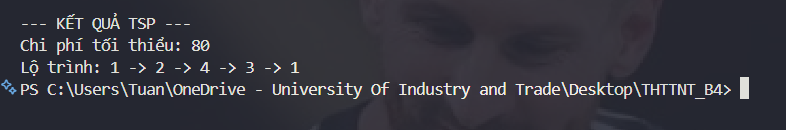